In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
274,4340000,6450,4,1,2,yes,no,no,no,no,0,no,semi-furnished
502,2660000,3480,2,1,1,yes,no,no,no,no,1,no,semi-furnished
340,3850000,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished
172,5250000,8400,3,1,2,yes,yes,yes,no,yes,2,yes,unfurnished
425,3360000,3185,2,1,1,yes,no,yes,no,no,2,no,furnished
296,4200000,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
509,2590000,3600,2,2,2,yes,no,yes,no,no,1,no,furnished
204,4900000,4770,3,1,1,yes,yes,yes,no,no,0,no,semi-furnished
318,4060000,4340,3,1,1,yes,no,no,no,no,0,no,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished


In [4]:
df=df.drop(columns=['bedrooms','bathrooms','guestroom'])

In [5]:
df

,price,area,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,3,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,2,yes,yes,no,no,2,yes,semi-furnished
3,12215000,7500,2,yes,yes,no,yes,3,yes,furnished
4,11410000,7420,2,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,yes,yes,no,no,2,no,unfurnished
541,1767150,2400,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,1,no,no,no,no,0,no,furnished


In [6]:
df.describe()

,price,area,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,1.805505,0.693578
std,1.870440e+06,2170.141023,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,4.000000,3.000000


In [7]:
df.value_counts()

price     area  stories  mainroad  basement  hotwaterheating  airconditioning  parking  prefarea  furnishingstatus
13300000  7420  3        yes       no        no               yes              2        yes       furnished           1
9100000   6000  2        yes       yes       no               no               2        no        semi-furnished      1
8960000   8500  4        yes       no        no               yes              2        no        furnished           1
8890000   4600  2        yes       no        no               yes              2        no        furnished           1
8855000   6420  2        yes       no        no               yes              1        yes       semi-furnished      1
                                                                                                                     ..
1855000   2990  1        no        no        no               no               1        no        unfurnished         1
1820000   3000  1        yes       yes       

In [8]:
df.isnull().sum()

price               0
area                0
stories             0
mainroad            0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
df

,price,area,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,3,yes,no,no,yes,2,yes,furnished
1,12250000,8960,4,yes,no,no,yes,3,no,furnished
2,12250000,9960,2,yes,yes,no,no,2,yes,semi-furnished
3,12215000,7500,2,yes,yes,no,yes,3,yes,furnished
4,11410000,7420,2,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,yes,yes,no,no,2,no,unfurnished
541,1767150,2400,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,1,no,no,no,no,0,no,furnished


In [10]:
df['mainroad']=df['mainroad'].map({'yes':1,'no':0})
df['basement']=df['basement'].map({'yes':1,'no':0})
df['hotwaterheating']=df['hotwaterheating'].map({'yes':1,'no':0})
df['airconditioning']=df['airconditioning'].map({'yes':1,'no':0})
df['prefarea']=df['prefarea'].map({'yes':1,'no':0})

In [11]:
df

,price,area,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,3,1,0,0,1,2,1,furnished
1,12250000,8960,4,1,0,0,1,3,0,furnished
2,12250000,9960,2,1,1,0,0,2,1,semi-furnished
3,12215000,7500,2,1,1,0,1,3,1,furnished
4,11410000,7420,2,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,0,0,2,0,unfurnished
541,1767150,2400,1,0,0,0,0,0,0,semi-furnished
542,1750000,3620,1,1,0,0,0,0,0,unfurnished
543,1750000,2910,1,0,0,0,0,0,0,furnished


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['furnishingstatus']=le.fit_transform(df['furnishingstatus'])

In [13]:
le.classes_

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [14]:
df

,price,area,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,3,1,0,0,1,2,1,0
1,12250000,8960,4,1,0,0,1,3,0,0
2,12250000,9960,2,1,1,0,0,2,1,1
3,12215000,7500,2,1,1,0,1,3,1,0
4,11410000,7420,2,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,1,1,1,0,0,2,0,2
541,1767150,2400,1,0,0,0,0,0,0,1
542,1750000,3620,1,1,0,0,0,0,0,2
543,1750000,2910,1,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df['area']=sc.fit_transform(df[['area']])

In [16]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [17]:
x

,area,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,3,1,0,0,1,2,1,0
1,1.757010,4,1,0,0,1,3,0,0
2,2.218232,2,1,1,0,0,2,1,1
3,1.083624,2,1,1,0,1,3,1,0
4,1.046726,2,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...
540,-0.991879,1,1,1,0,0,2,0,2
541,-1.268613,1,0,0,0,0,0,0,1
542,-0.705921,1,1,0,0,0,0,0,2
543,-1.033389,1,0,0,0,0,0,0,0


In [18]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred=model.predict(X_test)
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 1001194.8202962154
R-squared: 0.6083473221830971


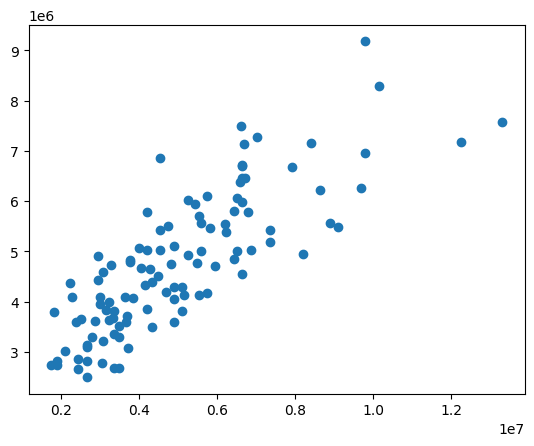

In [22]:
plt.scatter(y_test, y_pred)
